In [1]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [9]:
data = pd.DataFrame({
    'hours_studied': [5, 3, 4, 6, 2, 8, 7, 6, 9, 4],
    'test_scores': [80, 60, 70, 90, 50, 95, 85, 90, 100, 75],
    'attendance': [95, 90, 80, 85, 75, 90, 95, 80, 85, 70],
    'homework_completed': [80, 75, 70, 85, 65, 90, 95, 80, 85, 75],
    'grade': [75, 65, 70, 80, 60, 90, 85, 85, 95, 70]
})

In [10]:
x = data[['hours_studied','test_scores','attendance','homework_completed']]
y = data['grade']

In [11]:
model = LinearRegression()

In [12]:
rfe = RFE(estimator = model, n_features_to_select = 3)
rfe.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [13]:
selected_features = rfe.support_

In [14]:
for feature,selected in zip(x.columns, selected_features):
  if selected:
    print(feature)

hours_studied
test_scores
homework_completed


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

x = data[['hours_studied','test_scores','attendance','homework_completed']]
y = data['grade']

model1 = RandomForestRegressor()

feature_selector = SelectFromModel(estimator = model1)

feature_selector.fit(x,y)

selected_f = feature_selector.get_support()

for feature,selected in zip(x.columns, selected_f):
  if selected:
    print(feature)

hours_studied
test_scores


In [24]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

model2 = RandomForestRegressor()

sfs = SequentialFeatureSelector(estimator = model2, n_features_to_select=2, direction = 'backward')

sfs.fit(x,y)

selected_fe = sfs.get_support(indices = True)

print(selected_fe)

[0 1]


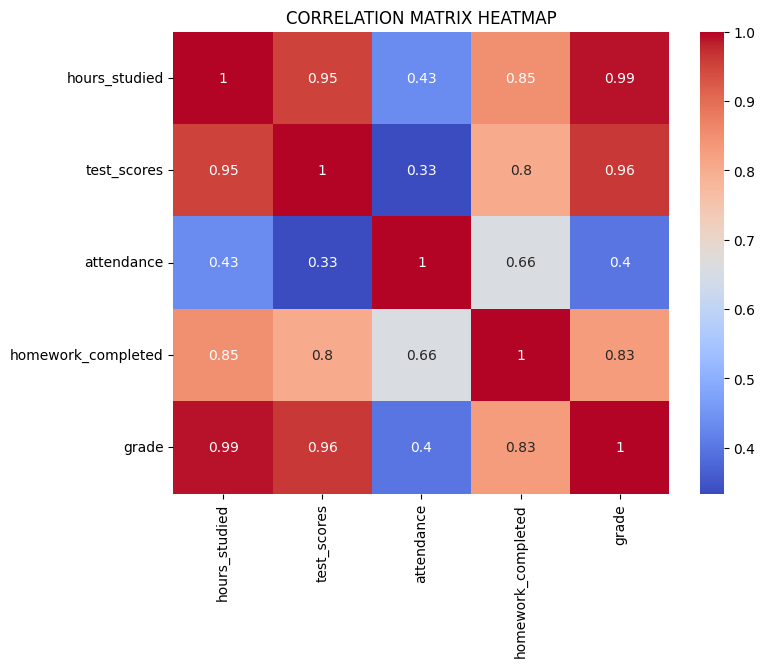

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title("CORRELATION MATRIX HEATMAP")
plt.show()